In [7]:
import pandas as pd

In [3]:
# Importing modules 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet50 import ResNet50
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [10]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  
train_path = 'E:/Sabudh Internship/ImageClf/test_train/temp_train/train'

for filename in os.listdir('E:/Sabudh Internship/ImageClf/test_train/temp_train/train'):
    if filename.split('.')[1] == 'jpg':
        
        img = cv2.imread(os.path.join(train_path,filename))
       
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

[0 1 0]


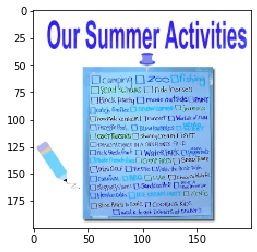

In [14]:
# Visualizing Training data
print(train_labels[340])
plt.imshow(train_images[340])

In [15]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(200,200,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)
for layer in restnet.layers:
    layer.trainable = False
# restnet.summary()

c:\program files (x86)\python\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 49s 1us/step


c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  import sys


In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_dim=(200,200,3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100352)            23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 75,232,643
Trainable params: 51,644,931
Non-trainable params: 23,587,712
_________________________________

In [17]:
# # Training the model
history = model.fit(x_train,y_train,epochs=5,batch_size=20,validation_data=(x_val,y_val))

Train on 479 samples, validate on 160 samples
Epoch 1/5
479/479 [==============================] - 151s 315ms/step - loss: 9.4675 - acc: 0.7328 - val_loss: 5.4624 - val_acc: 0.8313
Epoch 2/5
479/479 [==============================] - 143s 298ms/step - loss: 1.8972 - acc: 0.9165 - val_loss: 0.9827 - val_acc: 0.9500
Epoch 3/5
479/479 [==============================] - 145s 302ms/step - loss: 0.9759 - acc: 0.9457 - val_loss: 0.4696 - val_acc: 0.9500
Epoch 4/5
479/479 [==============================] - 143s 300ms/step - loss: 0.8463 - acc: 0.9666 - val_loss: 7.2620 - val_acc: 0.7875
Epoch 5/5
479/479 [==============================] - 143s 299ms/step - loss: 1.4405 - acc: 0.9582 - val_loss: 2.7514 - val_acc: 0.9000


In [18]:
model.save("Model_3_restnet50.h5")